In [32]:
import numpy as np
import seaborn as sns
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error
import statsmodels.api as sm
import statsmodels.formula.api as smf
import plotly.express as px
import patsy
import warnings
from datetime import datetime
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import RidgeCV
import plotly.graph_objs as go
import plotly.figure_factory as ff
import plotly.io as pio
from statsmodels.tsa.arima_model import ARIMA
pio.renderers.default='notebook'
%pylab inline
%config InlineBackend.figure_formats = ['retina']
sns.set_style("darkgrid", {"font.family": ["Times New Roman"]})
sns.set_context("talk") 

Populating the interactive namespace from numpy and matplotlib


C:\Users\Lenovo\anaconda3\lib\site-packages\IPython\core\magics\pylab.py:159: UserWarning:

pylab import has clobbered these variables: ['datetime']
`%matplotlib` prevents importing * from pylab and numpy



In [33]:
import hvplot.pandas


In [34]:
df1= pd.read_csv("NewData4.csv")
df1

,Unnamed: 0,Estate,Area,Price,city
0,0,أرض للبيع في حي ، شارع وادي الرمة ، ضاحية نمار...,800 م²,"800,000 ريال",riyad
1,1,أرض للبيع في طريق ديراب الفرعي ، حي ديراب ، ال...,10000 م²,"2,100,000 ريال",riyad
2,2,"أرض للبيع في طريق جبل أجياد, ضاحية نمار, الرياض",600 م²,"750,000 ريال",riyad
3,3,أرض للبيع في حي مطار الملك خالد الدولي ، الريا...,13200 م²,"52,800,000 ريال",riyad
4,4,أرض للبيع في شارع احمد اللغوي ، حي الوشام ، ال...,812 م²,"1,624,000 ريال",riyad
...,...,...,...,...,...
6573,6573,أرض للبيع في شارع الامام مسلم ، حي بدر ، الريا...,600 م²,"720,000 ريال",riyad
6574,6574,أرض للبيع في شارع مبارك بن سلمان ، حي النخيل ،...,715 م²,"5,219,500 ريال",riyad
6575,6575,أرض للبيع في شارع محمد بن علي ابا الخيل ، حي ا...,2100 م²,"10,080,000 ريال",riyad
6576,6576,أرض للبيع في حي الخير ، الرياض ، الدرعية,710 م²,"690,000 ريال",riyad


In [35]:
df1[df1.duplicated()]

,Unnamed: 0,Estate,Area,Price,city


In [36]:
df1.head()


,Unnamed: 0,Estate,Area,Price,city
0,0,أرض للبيع في حي ، شارع وادي الرمة ، ضاحية نمار...,800 م²,"800,000 ريال",riyad
1,1,أرض للبيع في طريق ديراب الفرعي ، حي ديراب ، ال...,10000 م²,"2,100,000 ريال",riyad
2,2,"أرض للبيع في طريق جبل أجياد, ضاحية نمار, الرياض",600 م²,"750,000 ريال",riyad
3,3,أرض للبيع في حي مطار الملك خالد الدولي ، الريا...,13200 م²,"52,800,000 ريال",riyad
4,4,أرض للبيع في شارع احمد اللغوي ، حي الوشام ، ال...,812 م²,"1,624,000 ريال",riyad


In [37]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6578 entries, 0 to 6577
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  6578 non-null   int64 
 1   Estate      6578 non-null   object
 2   Area        6578 non-null   object
 3   Price       6578 non-null   object
 4   city        6578 non-null   object
dtypes: int64(1), object(4)
memory usage: 257.1+ KB


In [38]:
df1.shape


(6578, 5)

# clean

In [39]:
df1['Estate'] = df1['Estate'].str.replace("الرياض","")
df1['Estate'] = df1['Estate'].str.replace("،","")
df1['Estate'] = df1.Estate.str.strip()
df1['Price'] = df1['Price'].str.replace("ريال","")
df1['Area'] = df1['Area'].str.replace("م²","")

def get_neighborhoo(Estate):
    if 'شارع' not in Estate:
          return None
    return str.split(Estate,'شارع')[1]

df1['neighborhoo'] = df1.Estate.map(get_neighborhoo)

In [40]:
df1.dropna(inplace=True)

In [41]:
def get_neighborhood(neighborhoo):
    if 'حي' not in neighborhoo:
          return None
    return str.split(neighborhoo, 'حي')[1]

df1['neighborhood'] = df1.neighborhoo.map(get_neighborhood)

In [42]:
df1.dropna(inplace=True)

In [43]:
to_drop = ['neighborhoo']
df1.drop(to_drop, inplace=True, axis=1)
df1.head()

,Unnamed: 0,Estate,Area,Price,city,neighborhood
0,0,أرض للبيع في حي شارع وادي الرمة ضاحية نمار,800,"800,000",riyad,ة نمار
4,4,أرض للبيع في شارع احمد اللغوي حي الوشام,812,"1,624,000",riyad,الوشام
8,8,أرض للبيع في شارع البقيع حي السعادة,1000,"2,800,000",riyad,السعادة
9,9,"أرض للبيع في شارع وادي الساحل, حي الرمال,",5750,"14,375,000",riyad,"الرمال,"
10,10,أرض للبيع في شارع الامام مسلم حي بدر,517,"465,300",riyad,بدر


In [44]:
df1['neighborhood']

0         ة نمار
4         الوشام
8        السعادة
9        الرمال,
10           بدر
          ...   
6570      العارض
6573         بدر
6574      النخيل
6575      الربوة
6577        حطين
Name: neighborhood, Length: 3857, dtype: object

In [45]:
df1.isna()

,Unnamed: 0,Estate,Area,Price,city,neighborhood
0,False,False,False,False,False,False
4,False,False,False,False,False,False
8,False,False,False,False,False,False
9,False,False,False,False,False,False
10,False,False,False,False,False,False
...,...,...,...,...,...,...
6570,False,False,False,False,False,False
6573,False,False,False,False,False,False
6574,False,False,False,False,False,False
6575,False,False,False,False,False,False


In [46]:
df1.isnull().sum()

Unnamed: 0      0
Estate          0
Area            0
Price           0
city            0
neighborhood    0
dtype: int64

In [47]:
df1.dropna(subset=['Area'])

,Unnamed: 0,Estate,Area,Price,city,neighborhood
0,0,أرض للبيع في حي شارع وادي الرمة ضاحية نمار,800,"800,000",riyad,ة نمار
4,4,أرض للبيع في شارع احمد اللغوي حي الوشام,812,"1,624,000",riyad,الوشام
8,8,أرض للبيع في شارع البقيع حي السعادة,1000,"2,800,000",riyad,السعادة
9,9,"أرض للبيع في شارع وادي الساحل, حي الرمال,",5750,"14,375,000",riyad,"الرمال,"
10,10,أرض للبيع في شارع الامام مسلم حي بدر,517,"465,300",riyad,بدر
...,...,...,...,...,...,...
6570,6570,أرض للبيع في شارع اسماء بنت مالك حي العارض,868,"3,472,000",riyad,العارض
6573,6573,أرض للبيع في شارع الامام مسلم حي بدر,600,"720,000",riyad,بدر
6574,6574,أرض للبيع في شارع مبارك بن سلمان حي النخيل,715,"5,219,500",riyad,النخيل
6575,6575,أرض للبيع في شارع محمد بن علي ابا الخيل حي ال...,2100,"10,080,000",riyad,الربوة


In [48]:
df1.rename(columns={
    'city' : 'City', 
    'neighborhood' : 'Neighborhood'
}, inplace = True)
df1

,Unnamed: 0,Estate,Area,Price,City,Neighborhood
0,0,أرض للبيع في حي شارع وادي الرمة ضاحية نمار,800,"800,000",riyad,ة نمار
4,4,أرض للبيع في شارع احمد اللغوي حي الوشام,812,"1,624,000",riyad,الوشام
8,8,أرض للبيع في شارع البقيع حي السعادة,1000,"2,800,000",riyad,السعادة
9,9,"أرض للبيع في شارع وادي الساحل, حي الرمال,",5750,"14,375,000",riyad,"الرمال,"
10,10,أرض للبيع في شارع الامام مسلم حي بدر,517,"465,300",riyad,بدر
...,...,...,...,...,...,...
6570,6570,أرض للبيع في شارع اسماء بنت مالك حي العارض,868,"3,472,000",riyad,العارض
6573,6573,أرض للبيع في شارع الامام مسلم حي بدر,600,"720,000",riyad,بدر
6574,6574,أرض للبيع في شارع مبارك بن سلمان حي النخيل,715,"5,219,500",riyad,النخيل
6575,6575,أرض للبيع في شارع محمد بن علي ابا الخيل حي ال...,2100,"10,080,000",riyad,الربوة


In [49]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3857 entries, 0 to 6577
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Unnamed: 0    3857 non-null   int64 
 1   Estate        3857 non-null   object
 2   Area          3857 non-null   object
 3   Price         3857 non-null   object
 4   City          3857 non-null   object
 5   Neighborhood  3857 non-null   object
dtypes: int64(1), object(5)
memory usage: 210.9+ KB


In [50]:
df1['Area'] = df1.Area.astype('float')
df1['Price'] = df1['Price'].apply(lambda x:x.replace(",",""))  
Price = df1.Price.str.strip()
df1['Price'] = df1.Price.astype('float')
df1.Price.mean()

6616386.15504278

In [51]:
df1['District'] = df1['Neighborhood'].replace({
    'ة نمار' : 'Namar' , ' النرجس' : 'Al-Narjis', ' طويق' : 'Twaiq' , ' القيروان' : 'Al-Qairouan' , 
    ' الجنادرية' : 'Al-Janadriyah' ,'ة نمار,' : 'Namar' , ' الجزيرة' : 'Al-Jazeera' , ' الحزم' : 'Al-Hazm', 
    ' المعيزيلة' : "Al-Ma'ayzela" , ' الملقا' : 'Al-Malqa' , ' المنصورة' : 'Al-Mansoura', ' حطين' : 'Hittin', 
    ' النموذجية': 'Al-Namouthajeeah' , ' المصيف' : 'Al-Masif' , ' العارض' : 'Al-Arid' , ' ظهرة لبن' : 'Dhahrat Laban', 
     ' الخليج' : 'Al-Khaleej' , ' النفل' : 'Al-Nafl' , ' الملك عبدالله' : 'King Abdullah' , ' بدر': 'Badr',
    ' الفلاح' : 'Falah' , ' عرقة' : 'Irqa',  ' القدس' : 'Al-Quds' ,' احد' : 'Uhud' , ' النخيل' :'Al-Nakhil', 
    'م بن الفرس  ' : 'Ibn al-Faras' , ' اليرموك': 'Al-Yarmouk', ' النهضة' : 'Al-Nahda',  ' الصحافة'  :'Al-Sahafa',
    ' الملك فيصل' : 'King Faisal', ' الورود' : 'Al-Wurd' , ' المغرزات':'Al-Mugharizat' , ' عكاظ' : 'Okaz',
    ' مطار الملك خالد الدولي' :'King Khalid International Airport' , ' الرمال' : 'Al-Rimal', ' البيان    رماح' : 'Al-Bayan', 
    ' مطار الملك خالد' : 'King Khalid International Airport' ,  'م الصديقي  ': 'NAN' ,  ' المونسية' : 'Al Munsiyah', 
    ' الفيحاء' :'Al Fayha', ' ديراب' : 'Dirab', ' قرطبة' : 'Qurtubah' , ' المهدية' :'Al-Mahdia',' المروج' : 'Almuruj', 
    ' الوادي' : 'Al-Wadi' , ' السعادة' : 'Al-Saadah' , ' المنار' : 'Al-Manar' , ' العليا' : 'Al-Olaya' , ' الشرق    رماح' : 'Al-Ramah', 
    ' التعاون' : 'Al-Taawun', ' القادسية'  : 'Al-Qadisiyah' , ' الريان' : 'Al-Rayyan', ' الزاهر    رماح' :'Al-Ramah', 
    ' صلاح الدين' : 'Salah al-Din', ' السليمانية' : 'Sulaymaniyah', ' الحائر': "Al-Ha'ir" ,  'مية  ' :'NAN' , 
     '  ' : 'NAN' , ' الشميسي' : 'Al-Shumaisi', 'م قاضي  ' : 'NAN' , ' الروضة' : 'Al-Rawdah', ' الشفا' : 'Al-Shifa',
     ' الملك فهد' : 'King Fahd', ' الشرفية' : 'NAN' , ' اليمامة' : 'NAN' ,  ' منفوحة'  : 'Manfuha', ' السلام' : 'Al-Salaam',
    ' الخزامى' : 'Al-Khuzama' , ' الرحمانية' : 'Al-Rahmaniyyah' , ' نمار' :'Namar' , ' ظهرة نمار' : 'Dhahrat Namar',
     ' العقيق' : 'Al-Aqiq' , ' الياسمين' : 'Al-Yasmin', ' اشبيلية' : 'Ishbiliyah' , ' المرسلات' : 'Al-Mursalat', 
    ' الازدهار' : 'Al-Izdihar' ,  ' المناخ' : 'Al-Manakh', ' الهدا' : 'Al-Hada',  ' الندى' : 'Al-Nada', ' الاندلس': 'Al-Andalus', 
     ' الحمراء' : 'Al-Hamra', ' المعذر الشمالي' : 'Al Maather Al Shamali', ' العريجاء الغربية' : 'Al Uraija Al Gharbia', 
    ' العزيزية' : 'Al Aziziyah', ' النسيم الغربي' : 'The Western Naseem',  ' المصفاة' : 'Al-Misfat', ' التضامن    رماح': 'Al-Ramah',
    ' ظهرة البديعة' : 'Dhahrat Al-Badiah', ' البديعة' : "Al-Badi'ah", ' النسيم الشرقي' : 'Al-Nasim Al-Shaqi' , 
     ' المصانع' : 'Al-Masani' ,  'ى امان  ': 'NAN' ,  ' الرائد' : 'Al-Raed',  ' منفوحة الجديدة' :'Manfuha al-Jadeeda', 
    'ى بن سامان  ': 'NAN' ,  ' جرير' :'Jarir' ,  ' الربيع': 'Al Rabee' , ' الغدير' : 'Al Ghadeer',  ' المحمدية' : 'Muhammadiyah',
    ' الغنامية' : 'Al-Ghanamiya',  ' السويدي' : 'Al-Suwaidi' , ' الضباط': 'Al-Dhubat' ,  'ميد  ' : 'NAN', 
    ' عريض' : 'Arid' , ' النزهة' :'Al-Nozhah', ' أم الحمام الغربي' : 'Umm al-Hammam al-Gharbi' ,  'مي  ': 'NAN' , 
    ' العريجاء' : 'Al-Uraija', ' طيبة': 'Taiba', ' الوسيطا' : 'NAN' ,  ' غرناطة' : 'Granada', ' المروة' : 'Al-Marwah', 
    ' بنبان' : 'Banban',' العريجاء الوسطى' : 'Al Uraija Al Wusta',  ' السلي': 'Al-Sulay',  ' النظيم' :'Al-Nazim',  ' أم الحمام الشرقي': 'Umm Al-Hamam Al-Sharqi',
     ' أبي خضير  ': 'Al-Qairouan' ,  'م  ' :'NAN' , ' الربوة': 'Al-Rabwah' ,  'ه بن خليفه  ': 'NAN' ,
     ' العمل' : 'Al-Aml' ,  ' الرفيعة' : 'Rafia',  ' لبن' :'Laban', ' الروابي' : 'Al Rawabi',  ' الندوة' :'Al-Nadwa', 
     ' رفه  ' : 'Namar',  ' الشهداء' : 'Al-Shuhada',  ' الخالدية' : 'Al-Khalidiyah', ' الدار البيضاء': 'Al-Dar Al-Baidha', 
     ' الرمال,':'Al-Rimal' ,  ' الملز' : 'Al-Malaz' ,  'ى الطائي  ': 'NAN',  'د  ' : 'NAN', ' الواحة' : 'Al-Waha', 
    'ى بن عمر المكي  ' : 'NAN',  '' : 'NAN',  ' الزهرة' :'Al-Zahrah' ,  ' أحد' :'Uhud',
    ' حفصه' : 'NAN' , ' السويدي الغربي' :'Al Suwaidi Al Gharbi',  'ى الرعيني  ' : 'Al-Zahrah', 
    ' الصناعية القديمة' : "Al-Sina'iyah Al-Gadeemah" ,  'م الخزرجي  ': 'Al-Khaldiayh' ,  ' الفيصلية' : 'Al-Faisaliah',
     ' ثليم' : 'NAN' ,  'ان بن عبدالله  ' : 'NAN' ,  'ري  ' : 'NAN' , 'ى الانطاكي  ': 'NAN' , ' الفاخرية' : 'Al-Fakhiriyyah', 
    ' المشاعل' : 'Al-Mashael' ,' ام سليم' :'Umm Salim', ' الزهراء': 'Al-Zahra',  'ى  ' : 'NAN' , 
     ' البرية' : 'Al-Birriyyah' , 'م الشامي  ': 'NAN',  'ى العمروني  ' : 'Hittin',  ' هجرة لبن' : 'Hijrat Laban', 
    ' شبرا' : 'Shubra', 'ان  ': 'NAN', ' غبيرة' : 'Ghubeira' ,  'فة  ': 'NAN' ,  ' الدفاع' : 'Ad Difa' , 
     ' سلطانة' : 'Sultana', ' الديرة' : 'Al-Deirah',  ' النور' : 'Al-Nur',  'اري  ':'NAN' , ' العود' : 'Al-Oud' , 
     ' المربع' : 'Al-Murabba',  'ي بن محمد الغرناطي  ': 'Al-Aarid' ,  ' الفوطة' : 'Al-Futah' ,  ' كمال  ': 'NAN', 
     'ان التو' : 'NAN' , ' المؤتمرات' : 'Al-Mutamarat' ,  'رة  ' : 'NAN' , 'ي الاسدي  ': 'Al-shmaysi' , 
    ' عليشة' : 'Ulaishah',  ' الملك عبدالعزيز' : 'King Abdulaziz' , ' المعذر' : 'Al-Maathar' , ' الدوبية': 'Al-Dubiyah', 
     ' صياح' : 'NAN' , 'ى بن أبي بكر  ' : 'NAN',  ' عكاظ,': 'Okaz' , ' الجرادية': 'Al-Jaradiyah' , 
    ' عتيقة': 'Utaiqah' , 'ى بن مروان  ':'NAN' , 'ه  ':'NAN', ' النرجس,': 'Al Narjis' ,  'ى بن النجار  ': 'NAN', 
     'ي بن اسعد  ' : 'NAN' ,  'م بن علي  ': 'NAN' ,  'ى بن معين  ':'NAN' ,  'ب الدويش  ' : 'NAN' , 
    'ذيف  ': 'NAN',  'ى بن عطوه  ' :'NAN' ,  ' الصفا' : 'Al-Safa' , 'در شهاب الدين  ': 'Al-Saadah', 
     ' المنصورية' : 'Al-Mansuriyah', 'ى الأزدي  ': 'NAN' , ' الوزارات'  :'Al-Wazarat',  'ى السعدي  ' : 'Al-Salam', 
     'ى الرندي  ' : 'NAN', ' ابو خضير  ': 'NAN', ' ام الشعال':'NAN' ,  'ى العدوي  ':'NAN', 'ميات  ':'NAN', 
    ' جبرة': 'NAN', ' المدينة الصناعية الثانية' : 'Al-Madinah Al-Snaaiyah Second' ,  'مة  ': 'NAN', 
    'ى بن خضير  ' : 'NAN',  'م الكناني  ':'NAN' , 'ي بن عدي  ' : 'NAN',  'ى بن ي':'NAN' , ' الناصرية': 'Al-Nasiriyah', 
    ' المرقب' :'Al-Marqab' ,  'مد  ': 'NAN',  ' سكيرينة' :'Sakirina',  'م البصري  ': 'NAN' , 'رات  ': 'NAN', 
    'باني  ' : 'NAN' , 'سية  ': 'NAN' , 'ل  ': 'NAN', 'ده بن معاويه  ' : 'NAN', 'اه  ' : 'NAN', 'ط  ':'NAN', 'ى الشاذلي  ': 'NAN', 
    ' الفاروق' : 'NAN', ' السليمانية,': 'Al-Sulimaniyah' , 'ى المنسكي  ': 'NAN', ' هيت':'NAN', 'سيه  ':'NAN',
} , inplace= False)

In [52]:
df1

,Unnamed: 0,Estate,Area,Price,City,Neighborhood,District
0,0,أرض للبيع في حي شارع وادي الرمة ضاحية نمار,800.0,800000.0,riyad,ة نمار,Namar
4,4,أرض للبيع في شارع احمد اللغوي حي الوشام,812.0,1624000.0,riyad,الوشام,الوشام
8,8,أرض للبيع في شارع البقيع حي السعادة,1000.0,2800000.0,riyad,السعادة,Al-Saadah
9,9,"أرض للبيع في شارع وادي الساحل, حي الرمال,",5750.0,14375000.0,riyad,"الرمال,",Al-Rimal
10,10,أرض للبيع في شارع الامام مسلم حي بدر,517.0,465300.0,riyad,بدر,Badr
...,...,...,...,...,...,...,...
6570,6570,أرض للبيع في شارع اسماء بنت مالك حي العارض,868.0,3472000.0,riyad,العارض,Al-Arid
6573,6573,أرض للبيع في شارع الامام مسلم حي بدر,600.0,720000.0,riyad,بدر,Badr
6574,6574,أرض للبيع في شارع مبارك بن سلمان حي النخيل,715.0,5219500.0,riyad,النخيل,Al-Nakhil
6575,6575,أرض للبيع في شارع محمد بن علي ابا الخيل حي ال...,2100.0,10080000.0,riyad,الربوة,Al-Rabwah


In [53]:
df1.drop('Unnamed: 0',
         axis='columns', inplace=True)
df1.drop('Neighborhood',
         axis='columns', inplace=True)
df1.drop('Estate',
         axis='columns', inplace=True)
df1.drop('City',
         axis='columns', inplace=True)

In [54]:
df1

,Area,Price,District
0,800.0,800000.0,Namar
4,812.0,1624000.0,الوشام
8,1000.0,2800000.0,Al-Saadah
9,5750.0,14375000.0,Al-Rimal
10,517.0,465300.0,Badr
...,...,...,...
6570,868.0,3472000.0,Al-Arid
6573,600.0,720000.0,Badr
6574,715.0,5219500.0,Al-Nakhil
6575,2100.0,10080000.0,Al-Rabwah


In [55]:
count = df1.District.value_counts()
count

Al-Narjis             576
Al-Arid               514
Namar                 356
Al-Malqa              298
Al-Qairouan           265
                     ... 
Ulaishah                1
اء                      1
Al-Waha                 1
Al Uraija Al Wusta      1
 الدريهمية              1
Name: District, Length: 143, dtype: int64

In [56]:
df1 = df1.loc[df1['District'].isin(count.index[count > 50])]
df1

,Area,Price,District
0,800.0,800000.0,Namar
9,5750.0,14375000.0,Al-Rimal
15,378.0,604800.0,Dhahrat Laban
19,450.0,1125000.0,Dhahrat Laban
20,600.0,3600000.0,Hittin
...,...,...,...
6566,4124.0,15465000.0,Al-Narjis
6567,900.0,3510000.0,Al-Narjis
6568,500.0,2000000.0,Al-Narjis
6570,868.0,3472000.0,Al-Arid


# EDA

C:\Users\Lenovo\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



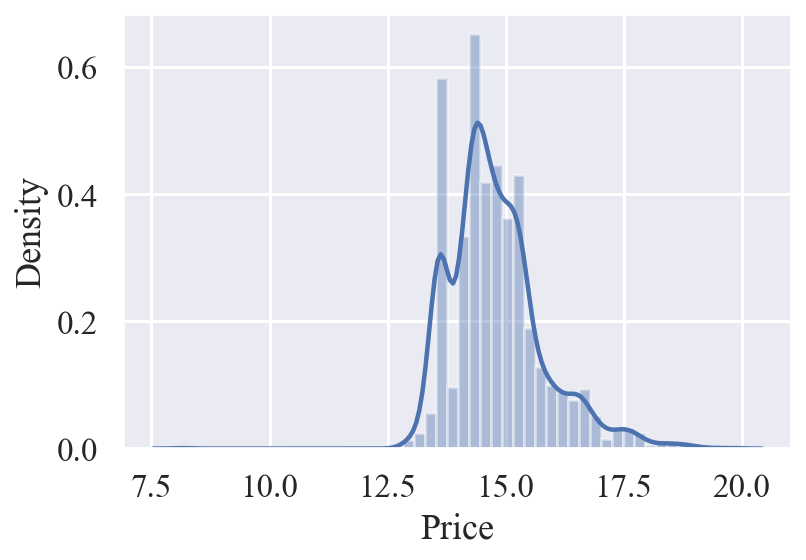

In [57]:
df1['Price'] = np.log(df1["Price"])
#check distribution after log transform.
sns.distplot(df1['Price'])
plt.show()


C:\Users\Lenovo\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



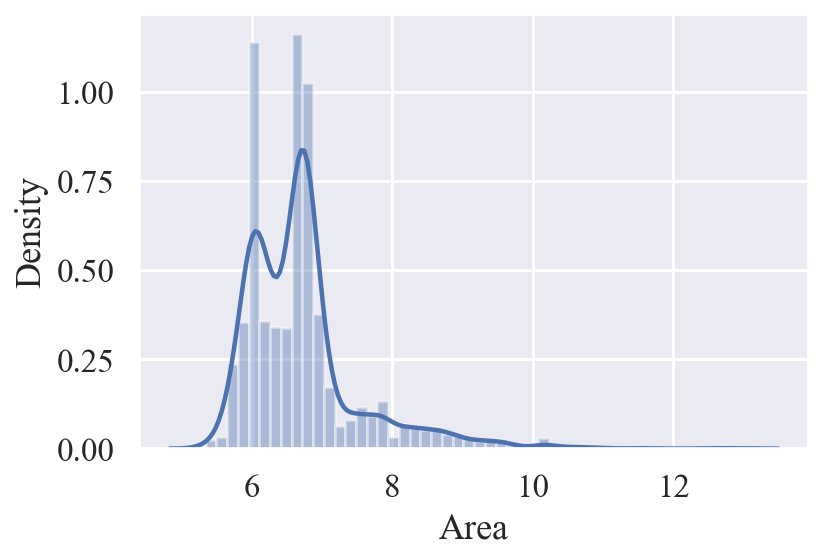

In [58]:
df1['Area'] = np.log(df1["Area"])
#check distribution after log transform.
sns.distplot(df1['Area'])
plt.show()

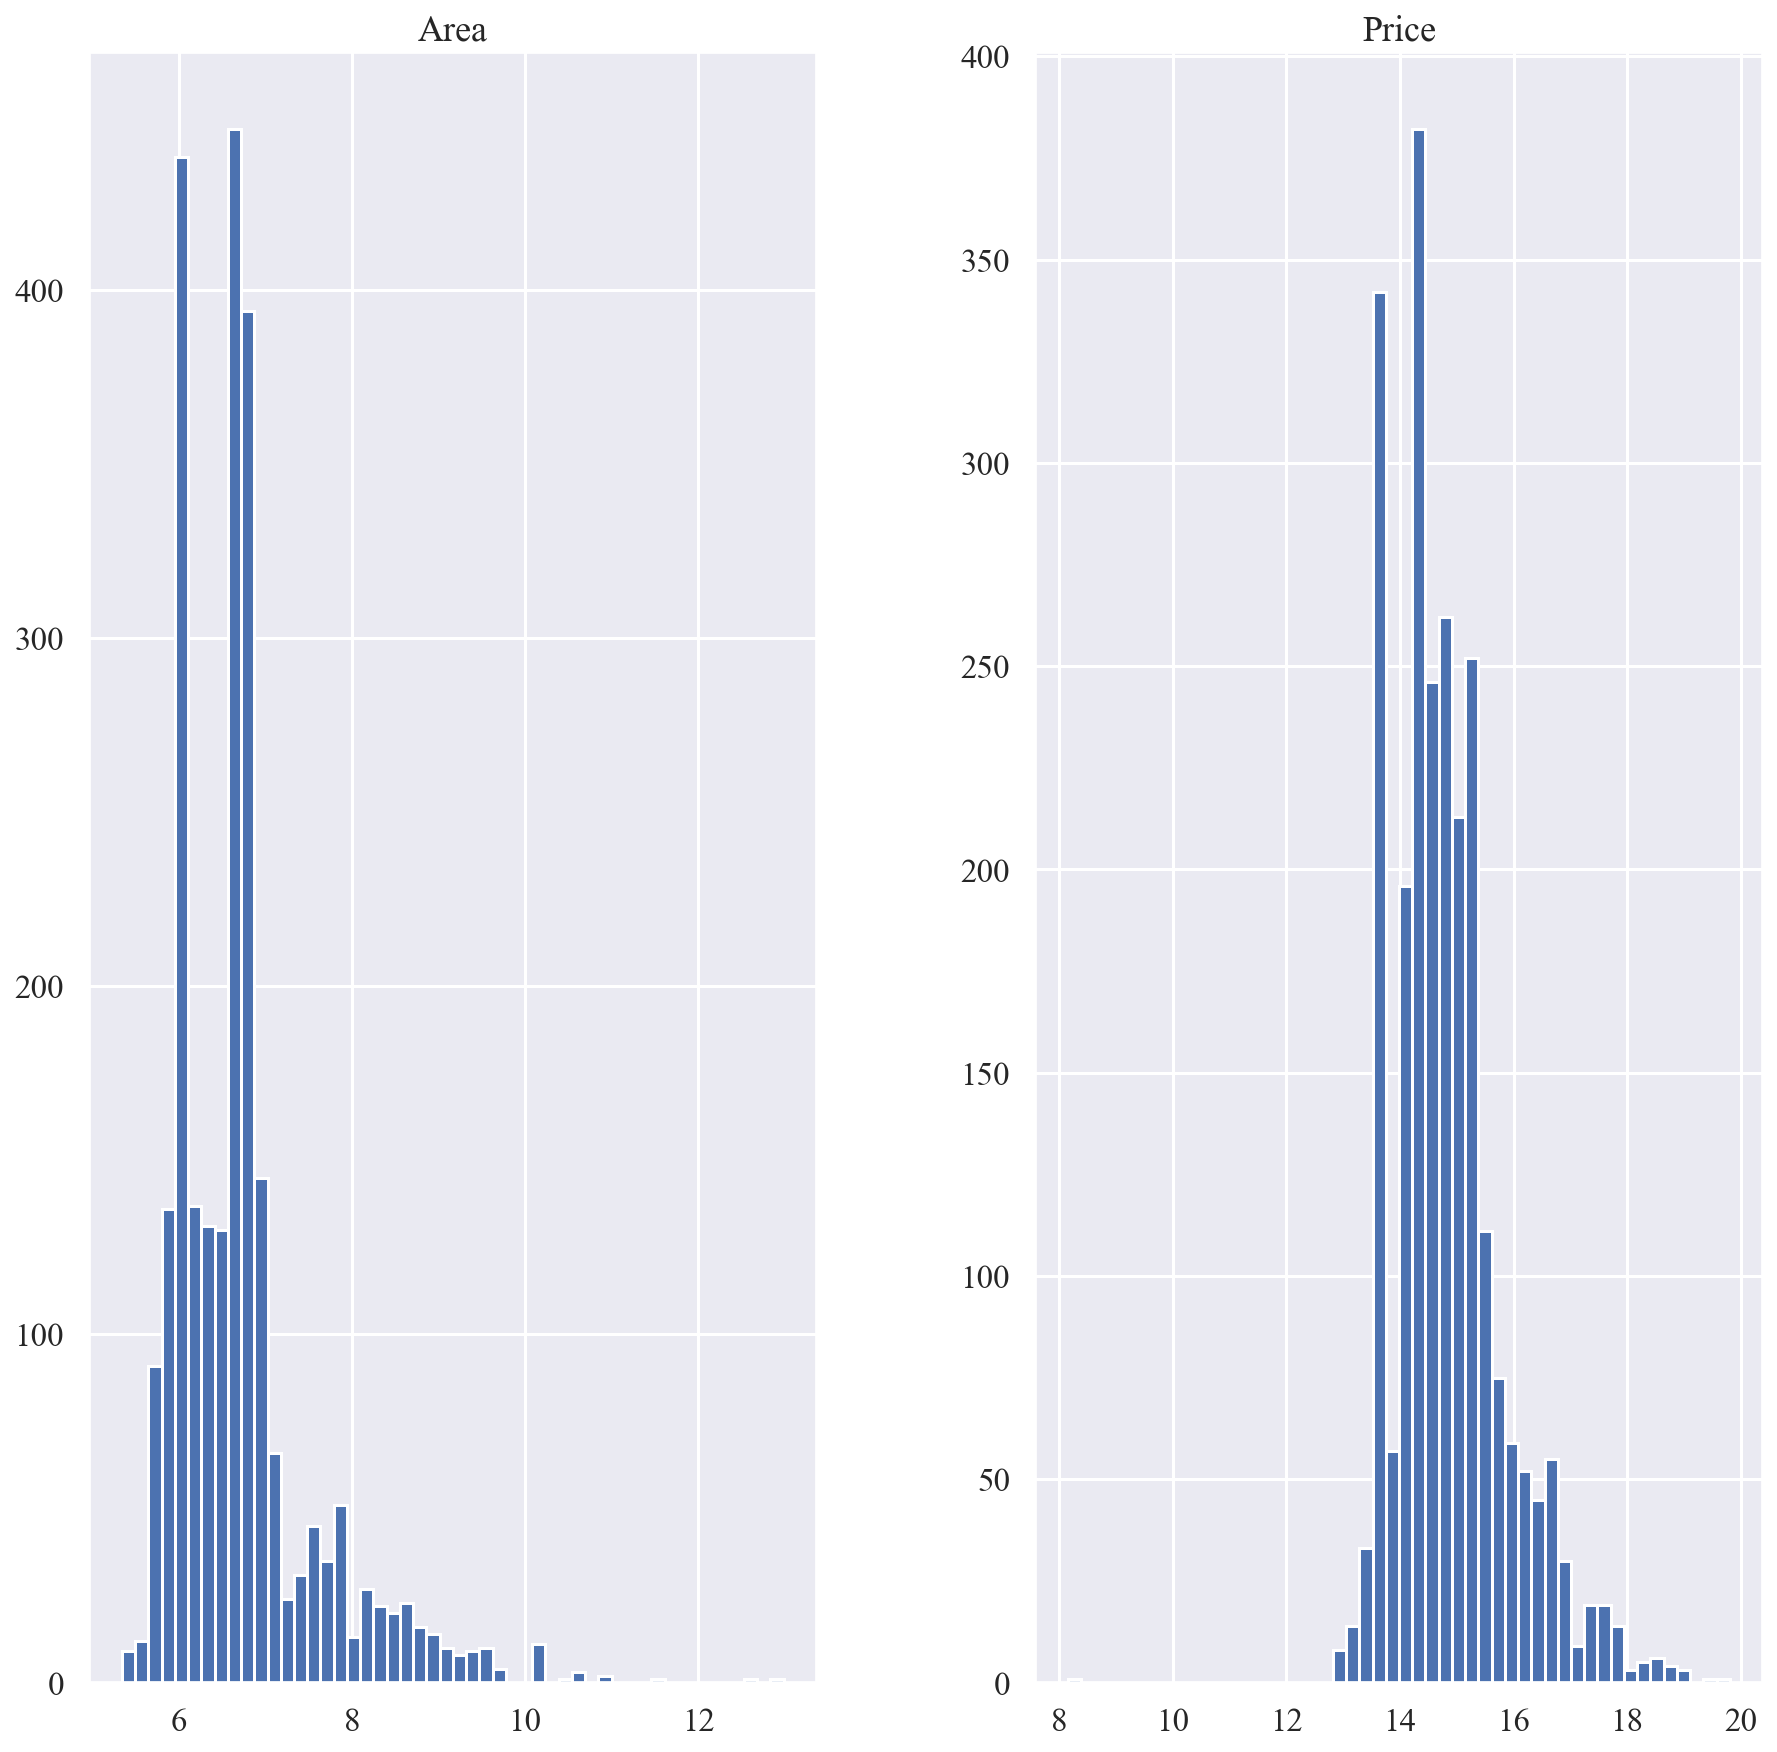

In [59]:
df1.hist(bins=50, figsize=(15,15));


In [60]:
df1.corr()


,Area,Price
Area,1.000000,0.800975
Price,0.800975,1.000000


<AxesSubplot:>

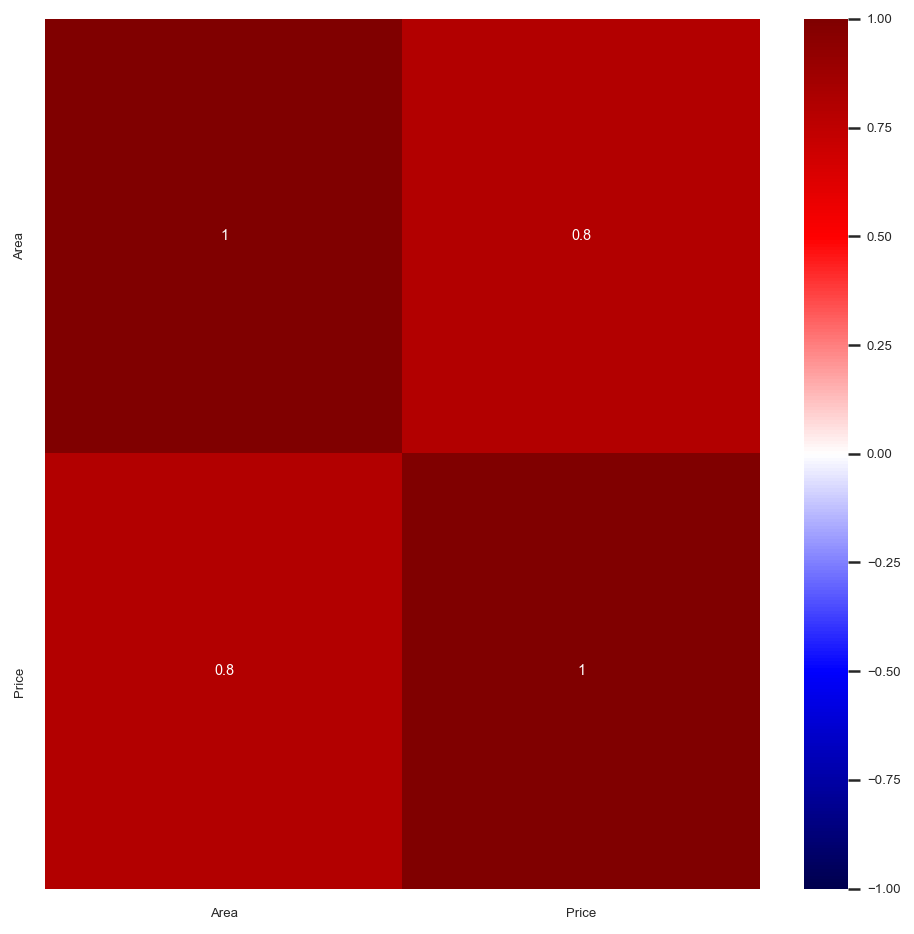

In [61]:
sns.set(font_scale=0.6)
plt.figure(figsize=(8,8))
sns.heatmap(df1.corr(), cmap="seismic", annot=True, vmin=-1, vmax=1)

# dummy variables

In [62]:
df1['Price'].nunique()

1064

In [63]:
pd.get_dummies(df1['Price'], drop_first=True).head()

,12.902340,12.911642,12.948010,12.952761,13.017003,13.032439,13.036805,13.038982,13.056224,13.058358,...,18.574260,18.673531,18.726870,18.783190,18.825746,18.938394,18.960677,18.991660,19.380031,19.806975
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
15,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
19,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
20,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [64]:
df1 = pd.get_dummies(df1, drop_first=True) #can just apply it to the whole df
df1.head()

,Area,Price,District_Al-Arid,District_Al-Malqa,District_Al-Narjis,District_Al-Qairouan,District_Al-Rimal,District_Al-Yarmouk,District_Dhahrat Laban,District_Hittin,District_Irqa,District_Namar
0,6.684612,13.592367,0,0,0,0,0,0,0,0,0,1
9,8.656955,16.481001,0,0,0,0,1,0,0,0,0,0
15,5.934894,13.312653,0,0,0,0,0,0,1,0,0,0
19,6.109248,13.933294,0,0,0,0,0,0,1,0,0,0
20,6.396930,15.096444,0,0,0,0,0,0,0,1,0,0


# Training a Linear Regression Model¶


In [65]:
# X and y arrays¶


In [66]:
X = df1[['Area','District_Al-Arid','District_Al-Malqa','District_Al-Narjis','District_Al-Qairouan','District_Al-Rimal','District_Al-Yarmouk','District_Dhahrat Laban','District_Hittin','District_Irqa','District_Namar']]
y = df1['Price']

# Train Test Split¶

Now let's split the data into a training set and a testing set. We will train out model on the training set and then use the test set to evaluate the model


In [67]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [68]:
from sklearn import metrics
from sklearn.model_selection import cross_val_score

def cross_val(model):
    pred = cross_val_score(model, X, y, cv=10)
    return pred.mean()

def print_evaluate(true, predicted):  
    mae = metrics.mean_absolute_error(true, predicted)
    mse = metrics.mean_squared_error(true, predicted)
    rmse = np.sqrt(metrics.mean_squared_error(true, predicted))
    r2_square = metrics.r2_score(true, predicted)
    print('MAE:', mae)
    print('MSE:', mse)
    print('RMSE:', rmse)
    print('R2 Square', r2_square)
    print('__________________________________')
    
def evaluate(true, predicted):
    mae = metrics.mean_absolute_error(true, predicted)
    mse = metrics.mean_squared_error(true, predicted)
    rmse = np.sqrt(metrics.mean_squared_error(true, predicted))
    r2_square = metrics.r2_score(true, predicted)
    return mae, mse, rmse, r2_square

In [69]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

pipeline = Pipeline([
    ('std_scalar', StandardScaler())
])

X_train = pipeline.fit_transform(X_train)
X_test = pipeline.transform(X_test)

# Linear Regression¶


In [70]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression(normalize=True)
lin_reg.fit(X_train,y_train)

LinearRegression(normalize=True)

In [71]:
print(lin_reg.intercept_)


14.818805261841502


In [72]:
coeff_df = pd.DataFrame(lin_reg.coef_, X.columns, columns=['Coefficient'])
coeff_df

,Coefficient
Area,0.800387
District_Al-Arid,-0.093677
District_Al-Malqa,0.067479
District_Al-Narjis,-0.055807
District_Al-Qairouan,-0.010276
District_Al-Rimal,-0.158060
District_Al-Yarmouk,-0.083940
District_Dhahrat Laban,-0.195136
District_Hittin,0.035798
District_Irqa,-0.029619


In [73]:
d=cross_val(lin_reg)

In [74]:
pred = lin_reg.predict(X_test)


In [75]:
pd.DataFrame({'True Values': y_test, 'Predicted Values': pred}).hvplot.scatter(x='True Values', y='Predicted Values')

:Scatter   [True Values]   (Predicted Values)

In [76]:
test_pred = lin_reg.predict(X_test)
train_pred = lin_reg.predict(X_train)

print('Test set evaluation:\n_____________________________________')
print_evaluate(y_test, test_pred)
print('Train set evaluation:\n_____________________________________')
print_evaluate(y_train, train_pred)

Test set evaluation:
_____________________________________
MAE: 0.10765199750606173
MSE: 0.02947594200305658
RMSE: 0.1716855905516144
R2 Square 0.9682389626535178
__________________________________
Train set evaluation:
_____________________________________
MAE: 0.11658537045766097
MSE: 0.06209050059723959
RMSE: 0.2491796552635058
R2 Square 0.9382737052077622
__________________________________


In [77]:
results_df = pd.DataFrame(data=[["Linear Regression", *evaluate(y_test, test_pred) , cross_val(LinearRegression())]], 
                          columns=['Model', 'MAE', 'MSE', 'RMSE', 'R2 Square', "Cross Validation"])
results_df

,Model,MAE,MSE,RMSE,R2 Square,Cross Validation
0,Linear Regression,0.107652,0.029476,0.171686,0.968239,0.944919


# Ridge Regression¶


In [78]:
from sklearn.linear_model import Ridge

model = Ridge(alpha=100, solver='cholesky', tol=0.0001, random_state=42)
model.fit(X_train, y_train)
pred = model.predict(X_test)

test_pred = model.predict(X_test)
train_pred = model.predict(X_train)

print('Test set evaluation:\n_____________________________________')
print_evaluate(y_test, test_pred)
print('====================================')
print('Train set evaluation:\n_____________________________________')
print_evaluate(y_train, train_pred)

Test set evaluation:
_____________________________________
MAE: 0.12060021387441466
MSE: 0.030572587270116778
RMSE: 0.17485018521613518
R2 Square 0.967057300968903
__________________________________
Train set evaluation:
_____________________________________
MAE: 0.13085250883073668
MSE: 0.06554122746137996
RMSE: 0.2560102096819187
R2 Square 0.9348432193586452
__________________________________


In [79]:
results_df_2 = pd.DataFrame(data=[["Ridge Regression", *evaluate(y_test, test_pred) , cross_val(Ridge())]], 
                            columns=['Model', 'MAE', 'MSE', 'RMSE', 'R2 Square', "Cross Validation"])
results_df = results_df.append(results_df_2, ignore_index=True)
results_df

,Model,MAE,MSE,RMSE,R2 Square,Cross Validation
0,Linear Regression,0.107652,0.029476,0.171686,0.968239,0.944919
1,Ridge Regression,0.120600,0.030573,0.174850,0.967057,0.944876


# LASSO Regression¶


In [80]:
from sklearn.linear_model import Lasso

model = Lasso(alpha=0.1, 
              precompute=True, 
#               warm_start=True, 
              positive=True, 
              selection='random',
              random_state=42)
model.fit(X_train, y_train)

test_pred = model.predict(X_test)
train_pred = model.predict(X_train)

print('Test set evaluation:\n_____________________________________')
print_evaluate(y_test, test_pred)
print('====================================')
print('Train set evaluation:\n_____________________________________')
print_evaluate(y_train, train_pred)

Test set evaluation:
_____________________________________
MAE: 0.39286354538970364
MSE: 0.2886512570952419
RMSE: 0.5372627449351406
R2 Square 0.6889713191944697
__________________________________
Train set evaluation:
_____________________________________
MAE: 0.38976609040160504
MSE: 0.30083550317340535
RMSE: 0.5484847337651299
R2 Square 0.7009291151748525
__________________________________


In [81]:
results_df_2 = pd.DataFrame(data=[["Lasso Regression", *evaluate(y_test, test_pred) , cross_val(Lasso())]], 
                            columns=['Model', 'MAE', 'MSE', 'RMSE', 'R2 Square', "Cross Validation"])
results_df = results_df.append(results_df_2, ignore_index=True)
results_df

,Model,MAE,MSE,RMSE,R2 Square,Cross Validation
0,Linear Regression,0.107652,0.029476,0.171686,0.968239,0.944919
1,Ridge Regression,0.120600,0.030573,0.174850,0.967057,0.944876
2,Lasso Regression,0.392864,0.288651,0.537263,0.688971,-0.004704


# Polynomial Regression¶


In [82]:
from sklearn.preprocessing import PolynomialFeatures

poly_reg = PolynomialFeatures(degree=2)

X_train_2_d = poly_reg.fit_transform(X_train)
X_test_2_d = poly_reg.transform(X_test)

lin_reg = LinearRegression(normalize=True)
lin_reg.fit(X_train_2_d,y_train)

test_pred = lin_reg.predict(X_test_2_d)
train_pred = lin_reg.predict(X_train_2_d)

print('Test set evaluation:\n_____________________________________')
print_evaluate(y_test, test_pred)
print('====================================')
print('Train set evaluation:\n_____________________________________')
print_evaluate(y_train, train_pred)

Test set evaluation:
_____________________________________
MAE: 0.10992146691026618
MSE: 0.03020051515924784
RMSE: 0.17378295416768538
R2 Square 0.9674582176285865
__________________________________
Train set evaluation:
_____________________________________
MAE: 0.11520561865741626
MSE: 0.06027773003257401
RMSE: 0.2455152338095826
R2 Square 0.9400758425587086
__________________________________


In [83]:
results_df_2 = pd.DataFrame(data=[["Polynomail Regression", *evaluate(y_test, test_pred), 0]], 
                            columns=['Model', 'MAE', 'MSE', 'RMSE', 'R2 Square', 'Cross Validation'])
results_df = results_df.append(results_df_2, ignore_index=True)
results_df

,Model,MAE,MSE,RMSE,R2 Square,Cross Validation
0,Linear Regression,0.107652,0.029476,0.171686,0.968239,0.944919
1,Ridge Regression,0.120600,0.030573,0.174850,0.967057,0.944876
2,Lasso Regression,0.392864,0.288651,0.537263,0.688971,-0.004704
3,Polynomail Regression,0.109921,0.030201,0.173783,0.967458,0.000000


In [84]:
from sklearn.ensemble import RandomForestRegressor

rf_reg = RandomForestRegressor(n_estimators=1000)
rf_reg.fit(X_train, y_train)

test_pred = rf_reg.predict(X_test)
train_pred = rf_reg.predict(X_train)

print('Test set evaluation:\n_____________________________________')
print_evaluate(y_test, test_pred)

print('Train set evaluation:\n_____________________________________')
print_evaluate(y_train, train_pred)

Test set evaluation:
_____________________________________
MAE: 0.10177258485820684
MSE: 0.039545136064045874
RMSE: 0.19885958881594287
R2 Square 0.9573891635669647
__________________________________
Train set evaluation:
_____________________________________
MAE: 0.07067961809975865
MSE: 0.03598271106459725
RMSE: 0.1896910937935602
R2 Square 0.9642283536252244
__________________________________


In [85]:
pred = rf_reg.predict(X_test)

In [86]:
pd.DataFrame({'True Values': y_test, 'Predicted Values': pred}).hvplot.scatter(x='True Values', y='Predicted Values')

:Scatter   [True Values]   (Predicted Values)

In [87]:
pd.DataFrame({'Error Values': (y_test - pred)}).hvplot.kde()

:Distribution   [Error Values]   (Density)

<AxesSubplot:ylabel='Model'>

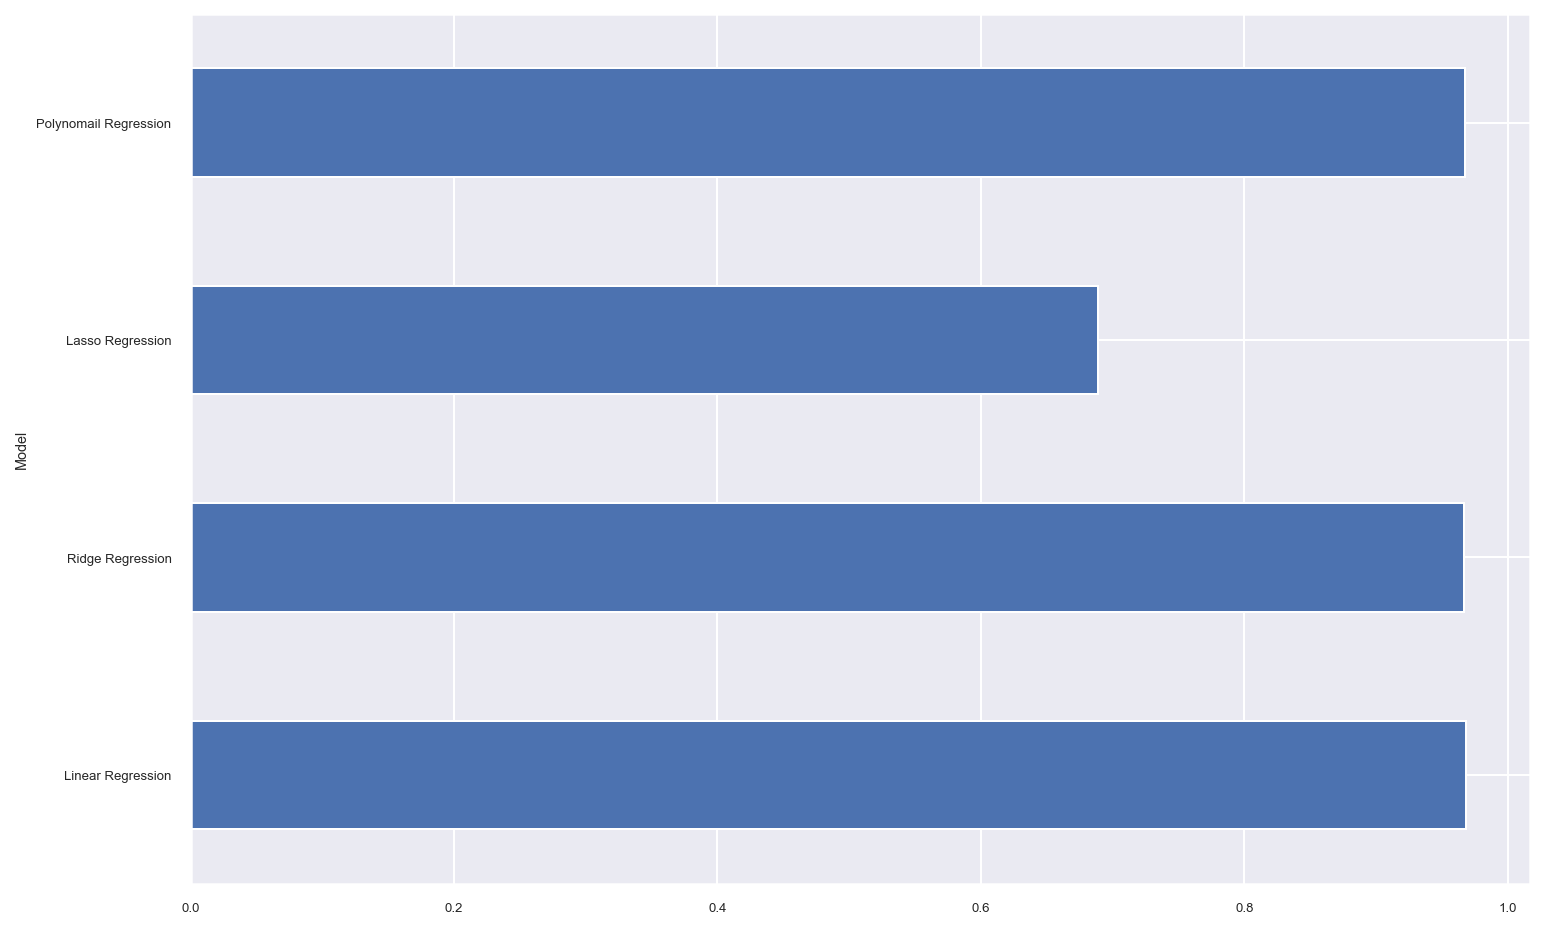

In [88]:
results_df.set_index('Model', inplace=True)
results_df['R2 Square'].plot(kind='barh', figsize=(12, 8))

In [89]:

#index_predf=pd.data_range(start='100000',end='1000000')
predf=lin_reg.predict(start=len(df1),end=len(df1)+365,type='levels').rename('ARIMA Predection')
print(predf)

TypeError: predict() got an unexpected keyword argument 'start'

In [ ]:
# N=16
# M=8
# fig, ax =plt.subplots(figsize=(N,M))
# df1.CLOSE.plot(legend=True)
# predf.plot(legend=True)
# plt.xticks(fontsize=15)
# plt.yticks(fontsize=15)

lin_reg.plot_predict(df1)
